In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import umap.umap_ as umap

In [2]:
data = pd.read_excel("processed_rnaseq.xlsx", usecols="B:J", index_col=-1)

data2 = data.copy()
bool1 = data == 0
data = data[~bool1.any(axis=1)]
print(data)
genelist = np.array(data.index)
print(genelist)

          0 min  5 min  10 min  30 min  60 min  120 min  180 min  240 min
GeneName                                                                 
ICR1         98     84      97     141      78      162       94      129
LSR1        142    170     175     129     116      223      102      164
NME1         10      9      18      20       1       10       12       17
NTS1-2     3399   3362    3731    2749    2283     4140     2904     2734
COX1        166    241     386     463     445      345      562      133
...         ...    ...     ...     ...     ...      ...      ...      ...
SNR85        34     30      18      42      15       22       10        9
SNR86       441    951    1321    1036     618      589      468      715
SNR87        28     47      25      32      31       77       23       20
SNR9         64     60      82     201      75       48       52       40
SUF7          2     13      14      31      51       32        5       15

[5068 rows x 8 columns]
['ICR1' 'LSR1

In [3]:
arr = data.values

data_norm = arr / np.max(arr, axis=1, keepdims=True)
print(arr)
print(data_norm)

[[ 98  84  97 ... 162  94 129]
 [142 170 175 ... 223 102 164]
 [ 10   9  18 ...  10  12  17]
 ...
 [ 28  47  25 ...  77  23  20]
 [ 64  60  82 ...  48  52  40]
 [  2  13  14 ...  32   5  15]]
[[0.60493827 0.51851852 0.59876543 ... 1.         0.58024691 0.7962963 ]
 [0.6367713  0.76233184 0.78475336 ... 1.         0.4573991  0.73542601]
 [0.5        0.45       0.9        ... 0.5        0.6        0.85      ]
 ...
 [0.36363636 0.61038961 0.32467532 ... 1.         0.2987013  0.25974026]
 [0.31840796 0.29850746 0.4079602  ... 0.23880597 0.25870647 0.19900498]
 [0.03921569 0.25490196 0.2745098  ... 0.62745098 0.09803922 0.29411765]]


[0.17314065 0.16214867 0.28661549 ... 0.22726693 0.24049401 0.30089216]
1267
5068


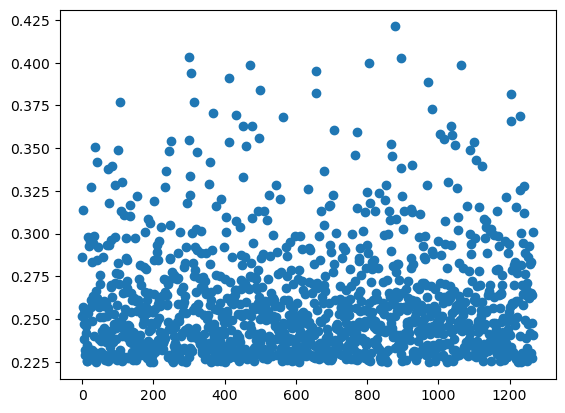

In [4]:
std = np.std(data_norm, axis=1)

print(std)
#plt.scatter(range(len(std)), std)
perc75 = np.percentile(std, 75)
print(len(std[std>perc75]))
print(len(data))
plt.scatter(range(len(std[std>perc75])), std[std>perc75])

In [5]:
fil_genes = genelist[std>perc75]

print(fil_genes)
data = data_norm[std>perc75]
data = pd.DataFrame(data, index=fil_genes, columns=data2.columns)
print(data)

['NME1' 'COX1' 'OLI1' ... 'SNR87' 'SNR9' 'SUF7']
          0 min     5 min    10 min    30 min    60 min   120 min   180 min  \
NME1   0.500000  0.450000  0.900000  1.000000  0.050000  0.500000  0.600000   
COX1   0.295374  0.428826  0.686833  0.823843  0.791815  0.613879  1.000000   
OLI1   0.500000  0.250000  0.750000  0.500000  1.000000  0.333333  0.916667   
COX3   0.200000  0.200000  0.700000  1.000000  0.100000  0.600000  0.200000   
RUF20  0.511111  1.000000  0.920000  0.537778  0.364444  0.475556  0.297778   
...         ...       ...       ...       ...       ...       ...       ...   
SNR83  0.516129  0.741935  0.688172  1.000000  0.419355  0.548387  0.086022   
SNR85  0.809524  0.714286  0.428571  1.000000  0.357143  0.523810  0.238095   
SNR87  0.363636  0.610390  0.324675  0.415584  0.402597  1.000000  0.298701   
SNR9   0.318408  0.298507  0.407960  1.000000  0.373134  0.238806  0.258706   
SUF7   0.039216  0.254902  0.274510  0.607843  1.000000  0.627451  0.098039   

  

NME1     0.286615
COX1     0.251993
OLI1     0.256851
COX3     0.313996
RUF20    0.253762
           ...   
SNR83    0.247837
SNR85    0.264060
SNR87    0.227267
SNR9     0.240494
SUF7     0.300892
Length: 1267, dtype: float64


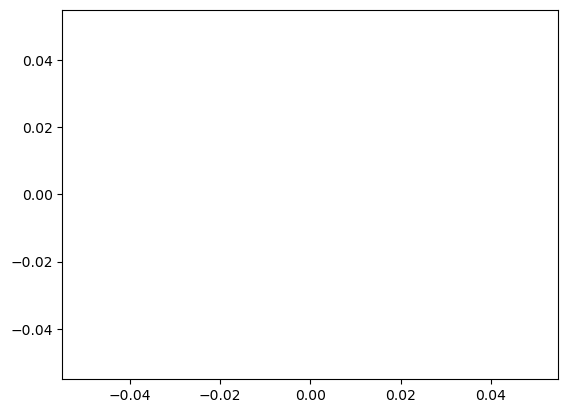

In [6]:
std = np.std(data, axis=1)

print(std)
plt.scatter(range(len(std[std > 2000])), std[std > 2000])
#plt.boxplot(np.log2(std))

In [8]:
fc = data.iloc[:, 1:].copy()
for i in range(len(fc.columns)):
    fc.iloc[:, i] /= data.iloc[:, 0]
logfc = np.log2(fc)
print(logfc)

          5 min    10 min    30 min    60 min   120 min   180 min   240 min
NME1  -0.152003  0.847997  1.000000 -3.321928  0.000000  0.263034  0.765535
COX1   0.537850  1.217418  1.479829  1.422622  1.055413  1.759387 -0.319757
OLI1  -1.000000  0.584963  0.000000  1.000000 -0.584963  0.874469 -0.263034
COX3   0.000000  1.807355  2.321928 -1.000000  1.584963  0.000000 -1.000000
RUF20  0.968291  0.847997  0.073373 -0.487938 -0.104023 -0.779401 -0.845490
...         ...       ...       ...       ...       ...       ...       ...
SNR83  0.523562  0.415037  0.954196 -0.299560  0.087463 -2.584963  0.000000
SNR85 -0.180572 -0.917538  0.304855 -1.180572 -0.628031 -1.765535 -1.917538
SNR87  0.747234 -0.163499  0.192645  0.146841  1.459432 -0.283793 -0.485427
SNR9  -0.093109  0.357552  1.651052  0.228819 -0.415037 -0.299560 -0.678072
SUF7   2.700440  2.807355  3.954196  4.672425  4.000000  1.321928  2.906891

[1267 rows x 7 columns]


In [9]:
bool_up = logfc > 1.5

upreg = data[bool_up.any(axis=1)]
bool_down = logfc < -1.5
downreg = data[bool_down.any(axis=1)]

In [10]:
print(upreg)
print(downreg)

          0 min     5 min    10 min    30 min    60 min   120 min   180 min  \
COX1   0.295374  0.428826  0.686833  0.823843  0.791815  0.613879  1.000000   
COX3   0.200000  0.200000  0.700000  1.000000  0.100000  0.600000  0.200000   
FRT2   0.177835  0.337629  0.538660  1.000000  0.791237  0.641753  0.458763   
BOL1   0.348837  0.500000  0.767442  1.000000  0.883721  0.558140  0.348837   
BDH2   0.113875  0.511913  0.729853  1.000000  0.416258  0.098809  0.059566   
...         ...       ...       ...       ...       ...       ...       ...   
SNR41  0.128205  0.820513  0.794872  1.000000  0.717949  0.564103  0.461538   
SNR67  0.341772  1.000000  0.848101  0.620253  0.721519  0.632911  0.291139   
SNR69  0.318182  0.681818  1.000000  0.848485  0.772727  0.363636  0.181818   
SNR9   0.318408  0.298507  0.407960  1.000000  0.373134  0.238806  0.258706   
SUF7   0.039216  0.254902  0.274510  0.607843  1.000000  0.627451  0.098039   

        240 min  
COX1   0.236655  
COX3   0.100000

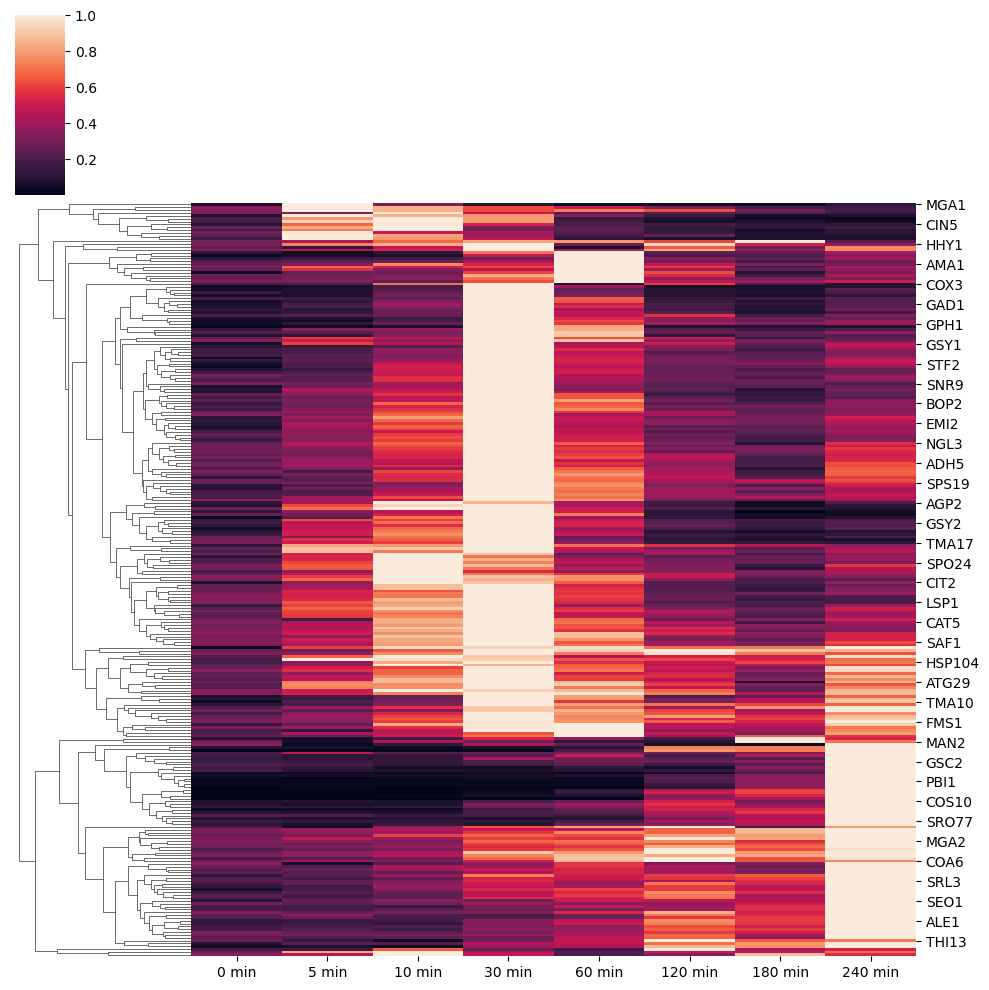

In [11]:
sns.clustermap(upreg, col_cluster=False)

In [15]:
max_col = upreg.idxmax(axis=1).apply(lambda x: upreg.columns.get_loc(x))
lst = []
for i in range(1, len(upreg.columns)):
    lst.append(list(max_col[max_col==i].index))
print(lst)

[['NRG1', 'FMP48', 'MGA1', 'HXT4', 'HAP4', 'GAT2', 'TPO4', 'SNR67'], ['AGP2', 'YPC1', 'CIT2', 'GPD1', 'ENA1', 'HSP42', 'HSP78', 'CYC7', 'HXT13', 'ZRG8', 'BTN2', 'SDP1', 'PHD1', 'MMO1', 'ATX1', 'CIN5', 'PNS1', 'TPK2', 'HSP82', 'SPO24', 'TDA6', 'CUR1', 'SNR39B', 'SNR69'], ['COX3', 'FRT2', 'BOL1', 'BDH2', 'ATG8', 'GAL7', 'HSP26', 'TPS1', 'ADH5', 'RTC2', 'SSE2', 'SDS24', 'OM14', 'SAF1', 'GLK1', 'ADY2', 'KIN82', 'GPM2', 'TMA17', 'HEM25', 'STF1', 'UGX2', 'RTN2', 'FMP45', 'MIX14', 'FMP16', 'TPS2', 'PHO92', 'WIP1', 'SDH6', 'EMI2', 'GLC3', 'HHY1', 'DLD3', 'PIC2', 'GIP2', 'PET117', 'RGI1', 'SSA4', 'SPI1', 'HSP12', 'GSY1', 'IGD1', 'HXK1', 'PNC1', 'VPS73', 'GPG1', 'RCK1', 'SAP4', 'YPS5', 'STF2', 'UGA1', 'ROM1', 'CTT1', 'XKS1', 'TDA10', 'MPC3', 'SOL4', 'ENO1', 'AIM17', 'YSC84', 'ECM12', 'RTC3', 'HXT5', 'GRE3', 'SPS100', 'SGA1', 'XBP1', 'COX5B', 'OM45', 'MET28', 'GTT1', 'YPS6', 'TDH1', 'SIP4', 'IRC9', 'FBP26', 'TPK1', 'ASG7', 'MHO1', 'VPS55', 'UGP1', 'CWP1', 'APE1', 'HSP104', 'UBI4', 'EMP46', 'TFS1'

In [16]:
print([i for i in range(len(lst)) if "AAC3" in lst[i]])

[6]


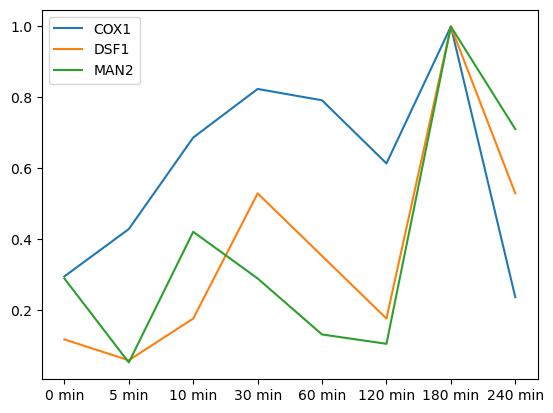

In [17]:
for i in range(len(upreg)):
    if list(upreg.index)[i] in lst[5]:
     plt.plot(upreg.columns, upreg.iloc[i, :], label=upreg.index[i])
plt.legend()

In [19]:
upreg_fc = (bool_up == True).idxmax(axis=1).apply(lambda x: bool_up.columns)
print(upreg_fc)
lst_upfc = []
for i in range(1, len(upreg.columns)):
    lst_upfc.append(list(upreg_fc[upreg_fc==i].index))
print(lst_upfc)

NME1     Index(['5 min', '10 min', '30 min', '60 min', ...
COX1     Index(['5 min', '10 min', '30 min', '60 min', ...
OLI1     Index(['5 min', '10 min', '30 min', '60 min', ...
COX3     Index(['5 min', '10 min', '30 min', '60 min', ...
RUF20    Index(['5 min', '10 min', '30 min', '60 min', ...
                               ...                        
SNR83    Index(['5 min', '10 min', '30 min', '60 min', ...
SNR85    Index(['5 min', '10 min', '30 min', '60 min', ...
SNR87    Index(['5 min', '10 min', '30 min', '60 min', ...
SNR9     Index(['5 min', '10 min', '30 min', '60 min', ...
SUF7     Index(['5 min', '10 min', '30 min', '60 min', ...
Length: 1267, dtype: object


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [21]:
for i in range(len(upreg)):
    if list(upreg.index)[i] in lst_upfc:
        plt.plot(upreg.columns, upreg.iloc[i, :], label=upreg.index[i])
